**FAHARUDDIEN AUNURRIZA**

**CAPSTONE_PROJECT_02**

**06**

**New York City TLC Trip Record**

**Background**

This data is an official record of *Green Taxi (Street Hail Livery)* trips provided by the *New York City Taxi and Limousine Commission (TLC)*. Green Taxis primarily operate in the outer boroughs of NYC (like Brooklyn, Queens, Staten Island, and the Bronx) and Upper Manhattan. The dataset captures every aspect of a trip, from the moment a passenger is picked up to the final payment, including geographical locations, trip length, time, and a detailed breakdown of the fare. The primary business concern is optimizing service delivery and balancing profit margins in these specific, high-growth outer borough markets.

**Problem Statement**

**The New York City Green Taxi** service needs to improve revenue per trip and optimize fleet deployment by better understanding dynamic passenger demand, trip performance and cost in the outer boroughs.

1. Demand & Efficiency	: What are the peak hours and days of the week for pickups, the average trip duration and which TLC zones (PULocationID) drive the highest trip volume?

2. Trip Performance	: What is the average speed performance of Standard TAXI vs JFK TAXI/Newark? And how is their performance during each trip?

3. Revenue & Cost	    : How much driver actually get additional tips/percentage tips from each trip? and how much the average cost per miles that each trip has?

**Data**

To answer the problem statement, we will analyze the official record of New York City Green Taxi service.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



The Dataset consist of the known Passenger count, pickup date time and trip distance informations that was registered when the Taxi start operating. There are 20 columns in the dataset, which are:

1.  VendorID : A code indicating the LPEP provider that provided
the record.
1 = Creative Mobile Technologies, LLC.,
2 = VeriFone Inc.

2.  lpep_pickup_datetime: The date and time when the meter was engaged.

3.  lpep_dropoff_datetime: The date and time when the meter was
disengaged.

4.  Passenger_count: The number of passengers in the vehicle.
This is a driver-entered value.

5.  Trip_distance: The elapsed trip distance in miles was reported by
the taximeter.

6.  PULocationID: TLC Taxi Zone in which the taximeter was engaged.

7.  DOLocationID: TLC Taxi Zone in which the taximeter was
disengaged.

8.  RateCodeID: The final rate code is in effect at the end of the trip.
1 = Standard rate,
2 =JFK,
3 =Newark,
4 =Nassau or Westchester,
5 =Negotiated fare,
6 =Group ride.

9.  Store_and_fwd_flag: This flag indicates whether the trip record was held
in the vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did
not have a connection to the server.
Y = store and forward trip
N = not a store and forward trip

10. Payment_type: A numeric code signifying how the passenger paid
for the trip.
1 = Credit card,
2 = Cash,
3 = No charge,
4 = Dispute,
5 = Unknown,
6 = Voided trip.

11. Fare_amount: The time-and-distance fare is calculated by the
meter. Extra Miscellaneous extras and surcharges.
Currently, this only includes the $0.50 and $1 rush
hour and overnight charges.

12. MTA_tax: $0.50 MTA tax that is automatically triggered based
on the metered rate in use.

13. Improvement_surcharge: $0.30 improvement surcharge assessed on hailed
trips at the flag
drop. The improvement surcharge began being
levied in 2015.

14. Tip_amount: This field is automatically populated for credit card
tips. Cash tips are not included.

15. Tolls_amount: The total amount of all tolls paid in the trip.

16. Total_amount: The total amount charged to passengers. Does not
include cash tips.

17. Trip_type: A code indicating whether the trip was a street hail
or a dispatch that is automatically assigned based
on the metered rate in use but can be altered by the
driver.
1 = Street-hail,
2 = Dispatch.

18. Extra: Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

19. Congestion_surcharge: A flat rate charge that applies to all trips picked up and dropped off below 96th Street in Manhattan.

20. ehail_fee: Additional column that only has NaN (probably used for additional data cleaning).

Here are some of the samples of heads (5) and tails (5) of the data:

In [34]:
file_path = r'D:\Study Folder\Purwadhika Learning\Modul-2\NYC_TLC_Trip_Record.csv'
output_file_name_tableau = 'Faza_06_nyc_tlc_clean_data_for_tableau.csv'
df = pd.read_csv(file_path)
display(df.head(), df.tail())

C:\Users\Diarra  Lenovo\AppData\Local\Temp\ipykernel_33644\1329974831.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


**Data Understanding and Data Cleaning** 

Before we analyze the data, we need to know our dataset (Data Understanding). We will find anomalies in our dataset to be handled in data cleaning process. 

First let's check the information of NYC_TLC_Trip_Record dataset.

In [35]:
print(f'The number of rows and column in df are {df.shape}')
df.info

The number of rows and column in df are (68211, 20)


<bound method DataFrame.info of        VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN

In [36]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [37]:
pd.set_option('display.max_colwidth', None)
# Unique data of each column
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                          data=listItem)
table1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In general, we can see that:
1. The dataset consisting of 68,211 records (66575 unique records) of NYC Green Taxi trips and composed of 20 columns.
2. By analyzing the Number of Unique values and the Unique Sample, we identify **three main types of data** that require attention: *Date/Time*(lpep_pickup_datetime, lpep_dropoff_datetime), *Categorical Codes*(RatecodeID, Payment_type, Trip_type), and *Numerical Values*(trip_distance, fare_amount, total_amount).
3. There is also *Location Guide*(PULocationID, DOLocationID) around 200~250 which is not useful for analyzing the main data, however these unique IDs correspond to TLC Taxi Zones, which is useful for mapping these IDs for creating insightful geographical visualizations in *Tableau*.
4. Date/Time (lpep_pickup_datetime, lpep_dropoff_datetime) : These columns have very high  unique values and are currently of the generic object (string) data type.These must be converted to the datetime format for time-based analysis (e.g., calculating trip duration, identifying peak hours).
5. Categorical Codes (RatecodeID, Payment_type, Trip_type) : These columns are critical for segmentation but use numeric codes (e.g., Payment_type has values like 1.0, 2.0, 3.0). These must be mapped using the Data Dictionary to their descriptive labels (e.g., 1=Credit Card, 2=Cash) to make visualizations and analysis understandable.
6. Numerical (trip_distance, fare_amount, total_amount) : These are the core variables for revenue and efficiency analysis. A review of their descriptive statistics (mean, min, max) is required to identify and handle outliers (e.g., 0-mile trips, excessively high fares) before accurate aggregation.
7. ehail_fee: This column has only one unique value (likely NaN) across almost all rows. This column is not useful for analysis and should be dropped from the analysis.
8. Additional Extra/Miscellaneous (congestion_surcharge, improvement_surcharge, extra): These column are used for extra fee based on some situational condition.

**Date/Time Conversion**

Before we do missing value and data cleaning, we must convert string column used for *'lpep_pickup_datetime', 'lpep_dropoff_datetime'* into a proper datetime objects, any invalid is going to turn into NaT(Not a Time).

In [38]:
datetime_cols = ['lpep_pickup_datetime', 'lpep_dropoff_datetime']

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce') 
    # Convert string columns to proper datetime objects. errors='coerce' turns invalid dates into NaT(Not a Time).

**Date/Time Calculation**

Next step we need a new column that make *trip_duration* so much easier to analyze and calculate, we also going to use **total minutes** for the trip duration making it to *trip_duration_minutes*.

In [39]:
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60
# Calculate the difference and convert the result from timedelta to total minutes

**Dropping Useless and Temporary column (Updated)**

We are going to remove *ehail_fee* and *trip_duration*. We no longer need trip_duration because we are going to use trip_duration_minutes

In [40]:
columns_to_drop = ['ehail_fee', 'trip_duration']

df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

**Outlier Removal/Filtering Illogical Trip**

We need to have a logical condition for Taxi trip, so this step need to be check:
1. Date/Time: Neither pickup nor dropoff time should be missing (this filters out NaT/NaN)
2. Distance: Trip distance must be greater than 0 miles. Trip with 0 miles or less is not logical.
3. Fare: Total amount must be greater than 0. Trip with 0 cost is also not logical.
4. Duration: Duration must be between 1 minute and 600 minutes (10 hours). We are going to assume that trip more than 10 hours and less then 1 minute is error on the driver part.

In [42]:
rows_before_filter = len(df)

df_cleaned = df[
    (df['lpep_pickup_datetime'].notna()) &
    (df['lpep_dropoff_datetime'].notna()) &
    (df['trip_distance'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_duration_minutes'] >= 1) &
    (df['trip_duration_minutes'] <= 600)
].copy() # Use .copy() to prevent SettingWithCopyWarning

rows_removed = rows_before_filter - len(df_cleaned)
df = df_cleaned

print(f"Total rows before filtering: {rows_before_filter}")
print(f"Total rows removed (Outliers/Invalid Data): {rows_removed}")
print(f"Final number of rows after cleaning: {len(df)}")

Total rows before filtering: 68211
Total rows removed (Outliers/Invalid Data): 4175
Final number of rows after cleaning: 64036


In [43]:
pd.set_option('display.max_colwidth', 50)
print(table1Desc.to_markdown(index=False))

| Column Name           |   Number of Unique | Unique Sample                                                            |
|:----------------------|-------------------:|:-------------------------------------------------------------------------|
| VendorID              |                  2 | [2 1]                                                                    |
| lpep_pickup_datetime  |              66575 | ['2023-01-01 00:26:10' '2023-01-01 00:51:03' '2023-01-01 00:35:12' ...   |
|                       |                    |  '2023-01-31 23:46:00' '2023-01-31 23:01:00' '2023-01-31 23:51:00']      |
| lpep_dropoff_datetime |              66519 | ['2023-01-01 00:37:11' '2023-01-01 00:57:49' '2023-01-01 00:41:32' ...   |
|                       |                    |  '2023-02-01 00:02:00' '2023-01-31 23:19:00' '2023-02-01 00:07:00']      |
| store_and_fwd_flag    |                  2 | ['N' 'Y' nan]                                                            |
| RatecodeID            

**Removing the remaining NaN**

As we can see the remaining 6 category of 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'store_and_fwd_flag' and 'congestion_surcharge' still has NaN value in them so we need to clean it as well to make sure our analysis later is correct.

In [44]:
rows_before_nan_sweep = len(df)
columns_for_final_sweep = [
    'RatecodeID', 
    'passenger_count', 
    'payment_type', 
    'trip_type', 
    'store_and_fwd_flag', 
    'congestion_surcharge'
]

df.dropna(subset=columns_for_final_sweep, inplace=True)

rows_removed_nan_sweep = rows_before_nan_sweep - len(df)
print(f"Dropped {rows_removed_nan_sweep} rows due to missing values in key categorical/financial columns.")
print(f"Final number of rows after sweep: {len(df)}")


Dropped 4176 rows due to missing values in key categorical/financial columns.
Final number of rows after sweep: 59860


**Additional feature for days and hour (for demand and efficiency analysis)**

From the 'lpep_pickup_datetime' we want to make a columns/map to show the 'pickup_hour' and the 'day_of_week'. This add 2 more columns.

In [45]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.dayofweek
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

**Additional feature for calculating average speed (for trip performance analysis)**

Using the 'trip_distance' and 'trip_duration_minutes' we can show the 'average_speed_mph'. This add 1 more column.

In [46]:
df['average_speed_mph'] = df['trip_distance'] / (df['trip_duration_minutes'] / 60)

**Additional infomation for RatecodeID and payment_type**

We are defining the number value for rate_code_map and payment_map(based on the Data Dictionary PDF) and we also made map for ratecode_name and payment_map to be use in the next analysis. With this we also add 2 more columns.

In [47]:
rate_code_map = {
    1: 'Standard Rate', 2: 'JFK', 3: 'Newark',
    4: 'Nassau/Westchester', 5: 'Negotiated Fare', 6: 'Group Ride'
}
df['Ratecode_Name'] = df['RatecodeID'].map(rate_code_map)

payment_map = {
    1: 'Credit Card', 2: 'Cash', 3: 'No Charge',
    4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'
}
df['Payment_Name'] = df['payment_type'].map(payment_map)




**Revenue and Cost Feature**

In order to do the analysis for Revenue & Cost, we need to get the update for *cost_per_mile*, *tip_percentage* and *fare_per_minute*. We will be using all the available data and do the mathematical equation epsilon to reduce margin error. With these we add 3 more columns.

In [48]:
epsilon = 1e-6 # to avoid mathematical error we add epsilon to the trip_distance
df['cost_per_mile'] = (df['fare_amount'] + df['tolls_amount'] + df['congestion_surcharge'] + df['mta_tax'] + df['improvement_surcharge']) / (df['trip_distance'] + epsilon)


df['tip_percentage'] = np.where(df['total_amount'] > 0, (df['tip_amount'] / df['total_amount']) * 100, 0)

df['fare_per_minute'] = df['fare_amount'] / df['trip_duration_minutes']


**Validating and Updating Unique Value**

In [49]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique, list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)

print(df.shape)
dfDesc



(59860, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,<bound method IndexOpsMixin.nunique of 0 ...,"[2023-01-26T13:24:39.000000000, 2023-01-15T11:..."
2,lpep_dropoff_datetime,datetime64[ns],0,<bound method IndexOpsMixin.nunique of 0 ...,"[2023-01-30T22:41:33.000000000, 2023-01-14T17:..."
3,store_and_fwd_flag,object,0,<bound method IndexOpsMixin.nunique of 0 ...,"[N, Y]"
4,RatecodeID,float64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[1.0, 2.0]"
5,PULocationID,int64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[212, 206]"
6,DOLocationID,int64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[211, 23]"
7,passenger_count,float64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[1.0, 0.0]"
8,trip_distance,float64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[4.03, 1.06]"
9,fare_amount,float64,0,<bound method IndexOpsMixin.nunique of 0 ...,"[29.97, 9.3]"


So after the final sweep we left with 59860 rows and 29 column.

**DATA ANALYSIS**

We are done with cleaning the data. Now we can start analyzing the data set to find out about:
1. Demand & Efficiency	: What are the peak hours and days of the week for pickups, the average trip duration and which TLC zones (PULocationID) drive the highest trip volume?

2. Trip Performance	: What is the average speed performance of Standard TAXI vs JFK TAXI? And how is their performance during each trip?

3. Revenue & Cost	    : How much driver actually get additional tips/percentage tips from each trip? and how much the average cost per miles that each trip has?

The analysis will be done by comparing the correct data based on the question we want to answer.


**Demand & Efficiency**

In [50]:
print(df['lpep_pickup_datetime'].value_counts())
print(df['trip_duration_minutes'].value_counts())
print(df['PULocationID'].value_counts())

lpep_pickup_datetime
2023-01-09 13:11:24    3
2023-01-10 18:18:09    3
2023-01-04 16:34:30    3
2023-01-11 19:00:44    3
2023-01-12 10:07:48    3
                      ..
2023-01-31 23:09:22    1
2023-01-31 23:06:18    1
2023-01-31 23:17:03    1
2023-01-31 23:29:18    1
2023-01-01 00:33:04    1
Name: count, Length: 58955, dtype: int64
trip_duration_minutes
7.350000      98
10.216667     92
8.866667      92
6.166667      92
6.833333      91
              ..
35.966667      1
109.750000     1
61.583333      1
518.216667     1
38.066667      1
Name: count, Length: 3168, dtype: int64
PULocationID
74     12610
75      8618
95      3646
41      3615
166     3548
       ...  
175        1
23         1
19         1
183        1
245        1
Name: count, Length: 184, dtype: int64


We need to find and compare the peak hour for each trip per hour to find the hourly_analysis. In order to found the hourly_analysis we need to count the 'lpep_pickup_datetime' to make it 'total_trips' and average the 'trip_duration_minutes' to provide the 'avg_duration_min', then we aggregate them together.

In [51]:
# Hourly Analysis: Trip Count and Average Duration
hourly_analysis = df.groupby('pickup_hour').agg(
    total_trips=('lpep_pickup_datetime', 'count'),
    avg_duration_min=('trip_duration_minutes', 'mean')
).reset_index()

print("\nHourly Trip Demand and Average Duration:")
print(hourly_analysis.to_markdown(index=False))


Hourly Trip Demand and Average Duration:
|   pickup_hour |   total_trips |   avg_duration_min |
|--------------:|--------------:|-------------------:|
|             0 |           951 |            12.9539 |
|             1 |           746 |            12.3585 |
|             2 |           522 |            13.9739 |
|             3 |           463 |            14.338  |
|             4 |           342 |            14.2854 |
|             5 |           326 |            14.6821 |
|             6 |           818 |            11.688  |
|             7 |          2264 |            12.6633 |
|             8 |          2728 |            13.8531 |
|             9 |          2983 |            13.5521 |
|            10 |          3128 |            13.5358 |
|            11 |          3189 |            13.5319 |
|            12 |          3268 |            13.6493 |
|            13 |          3476 |            14.1009 |
|            14 |          3874 |            15.4712 |
|            15 |      

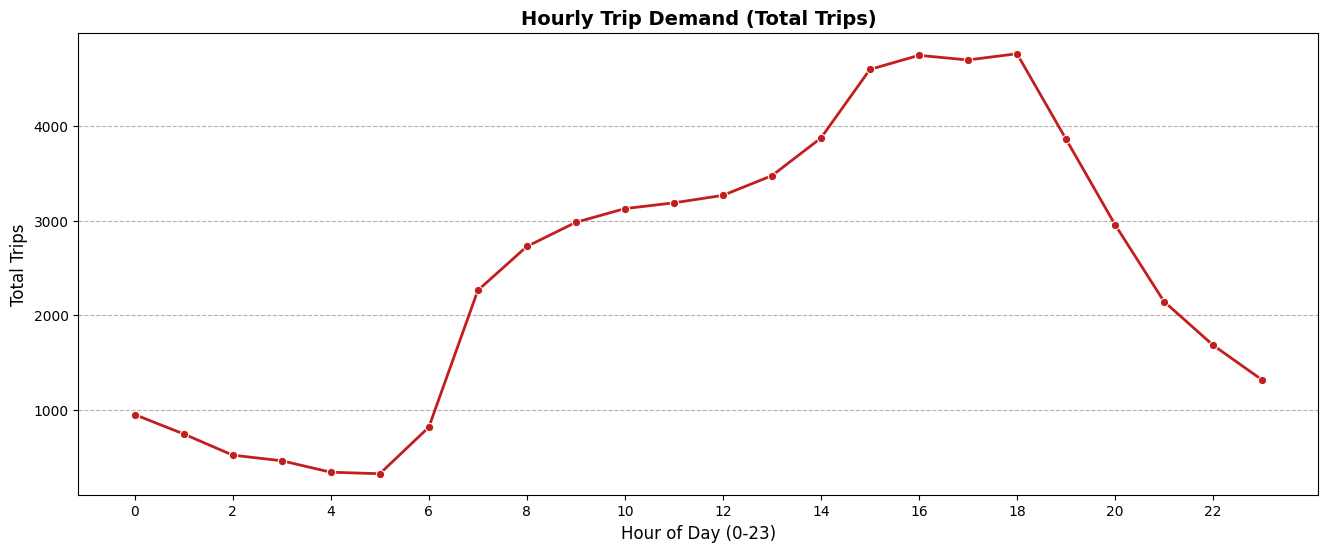

In [52]:
plt.figure(figsize=(16, 6))

# Hourly Demand
sns.lineplot(x='pickup_hour', y='total_trips', data=hourly_analysis, marker='o', color="#c31e1e", linewidth=2)
plt.title('Hourly Trip Demand (Total Trips)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(axis='y', linestyle='--')

We can see that the peak hour with the highest total trip is in hour 18 with 4765 total trips and the lowest total trip of only 326 on hour 5 with the fastest average duration of 11.688 minutes. We can conclude that the most packed hour is during 6 p.m. evening.

We need to find and compare the peak days for each trip per day to find the daily_analysis. In order to found the daily_analysis we need to count the 'lpep_pickup_datetime' to make it 'total_trips' and average the 'trip_duration_minutes' to provide the 'avg_duration_min'.

In [53]:
# Daily Analysis: Trip Count and Average Duration
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_analysis = df.groupby('day_of_week_name').agg(
    total_trips=('lpep_pickup_datetime', 'count'),
    avg_duration_min=('trip_duration_minutes', 'mean')
).reindex(day_order).reset_index()

print("\nDaily Trip Demand and Average Duration:")
print(daily_analysis.to_markdown(index=False))


Daily Trip Demand and Average Duration:
| day_of_week_name   |   total_trips |   avg_duration_min |
|:-------------------|--------------:|-------------------:|
| Mon                |          8774 |            13.3829 |
| Tue                |          9932 |            14.1511 |
| Wed                |          8704 |            13.6043 |
| Thu                |          8963 |            14.388  |
| Fri                |          8770 |            13.7749 |
| Sat                |          7483 |            13.5151 |
| Sun                |          7234 |            12.9375 |


C:\Users\Diarra  Lenovo\AppData\Local\Temp\ipykernel_33644\1327140935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week_name', y='avg_duration_min', data=daily_analysis, palette='Pastel1')


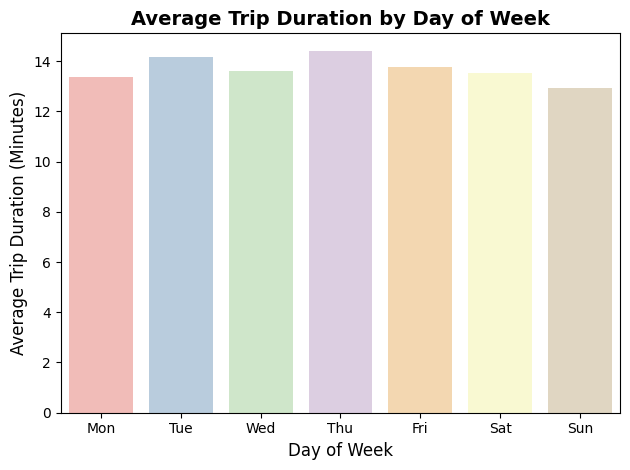

In [54]:
# Daily Efficiency
sns.barplot(x='day_of_week_name', y='avg_duration_min', data=daily_analysis, palette='Pastel1')
plt.title('Average Trip Duration by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Trip Duration (Minutes)', fontsize=12)
plt.tight_layout()
plt.show()

We can see that the Thursday has the highest average trip duration of 14.388 minutes with sunday being the lowest at 12.9375 minutes. And the busiest day on average with total trip of 9932 is tuesday. We can conclude that driver has to drive more distance on Thursday then any other days.

And lastly to know which of the highest trip volume TLC zones (PULocationID) we are going to count PUlocationID into zone_volume.

In [55]:
zone_volume = df.groupby('PULocationID')['PULocationID'].count()

top_10_zones = zone_volume.sort_values(ascending=False).head(10)

print(top_10_zones)

PULocationID
74     12610
75      8618
95      3646
41      3615
166     3548
43      2818
82      2767
97      2063
7       1624
244     1595
Name: PULocationID, dtype: int64


From this we now know that PULocationID 74 has the highest pick up count, thats mean people like to order TAXI from that location in NYC.

So we can conclude for the "Demand & Effeciency" that people in NYC like to order TAXI on 6 p.m. the most. With the highest trip order on tuesday, and the longest route taken on average happen on Thursday with an average of 14.388 minutes ride duration. We also conclude that the average ride take around 11.6 to 15.9 minutes for TAXI from pick up the passenger to drop the passenger on location.

**Trip Performance**

In [56]:
print(df['lpep_pickup_datetime'].value_counts())
print(df['average_speed_mph'].value_counts())
print(df['trip_distance'].value_counts())

lpep_pickup_datetime
2023-01-09 13:11:24    3
2023-01-10 18:18:09    3
2023-01-04 16:34:30    3
2023-01-11 19:00:44    3
2023-01-12 10:07:48    3
                      ..
2023-01-31 23:09:22    1
2023-01-31 23:06:18    1
2023-01-31 23:17:03    1
2023-01-31 23:29:18    1
2023-01-01 00:33:04    1
Name: count, Length: 58955, dtype: int64
average_speed_mph
9.000000     101
12.000000     77
8.000000      46
10.285714     42
9.600000      38
            ... 
18.119522      1
13.696658      1
8.563877       1
19.264463      1
18.501071      1
Name: count, Length: 43473, dtype: int64
trip_distance
1.40     623
1.30     553
1.20     516
1.50     473
1.00     470
        ... 
14.10      1
11.92      1
15.51      1
23.83      1
16.92      1
Name: count, Length: 1723, dtype: int64


In order to know the trip performance we are going to aggregate the mean of 'average_speed_mph', the median of 'trip_distance' and the count of 'lpep_pickup_datetime'.

In [57]:
ratecode_performance = df.groupby('Ratecode_Name').agg(
    avg_speed_mph=('average_speed_mph', 'mean'),
    median_distance=('trip_distance', 'median'),
    trip_count=('lpep_pickup_datetime', 'count')
).reset_index().sort_values(by='avg_speed_mph', ascending=False)

print("\nAverage Speed and Distance by Ratecode:")
print(ratecode_performance.to_markdown(index=False))

# D. Overall Speed Distribution
print("\nOverall Average Speed (MPH):")
print(df['average_speed_mph'].describe().to_markdown())


Average Speed and Distance by Ratecode:
| Ratecode_Name      |   avg_speed_mph |   median_distance |   trip_count |
|:-------------------|----------------:|------------------:|-------------:|
| Newark             |         31.3886 |            23.09  |           15 |
| Nassau/Westchester |         29.5745 |            15.16  |           52 |
| JFK                |         24.7363 |            18.095 |          120 |
| Negotiated Fare    |         21.5745 |             3.4   |          746 |
| Standard Rate      |         11.6844 |             1.88  |        58927 |

Overall Average Speed (MPH):
|       |   average_speed_mph |
|:------|--------------------:|
| count |       59860         |
| mean  |          11.8543    |
| std   |          16.8577    |
| min   |           0.0068156 |
| 25%   |           8.50909   |
| 50%   |          10.5714    |
| 75%   |          13.5541    |
| max   |        3910.91      |


C:\Users\Diarra  Lenovo\AppData\Local\Temp\ipykernel_33644\1730005801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


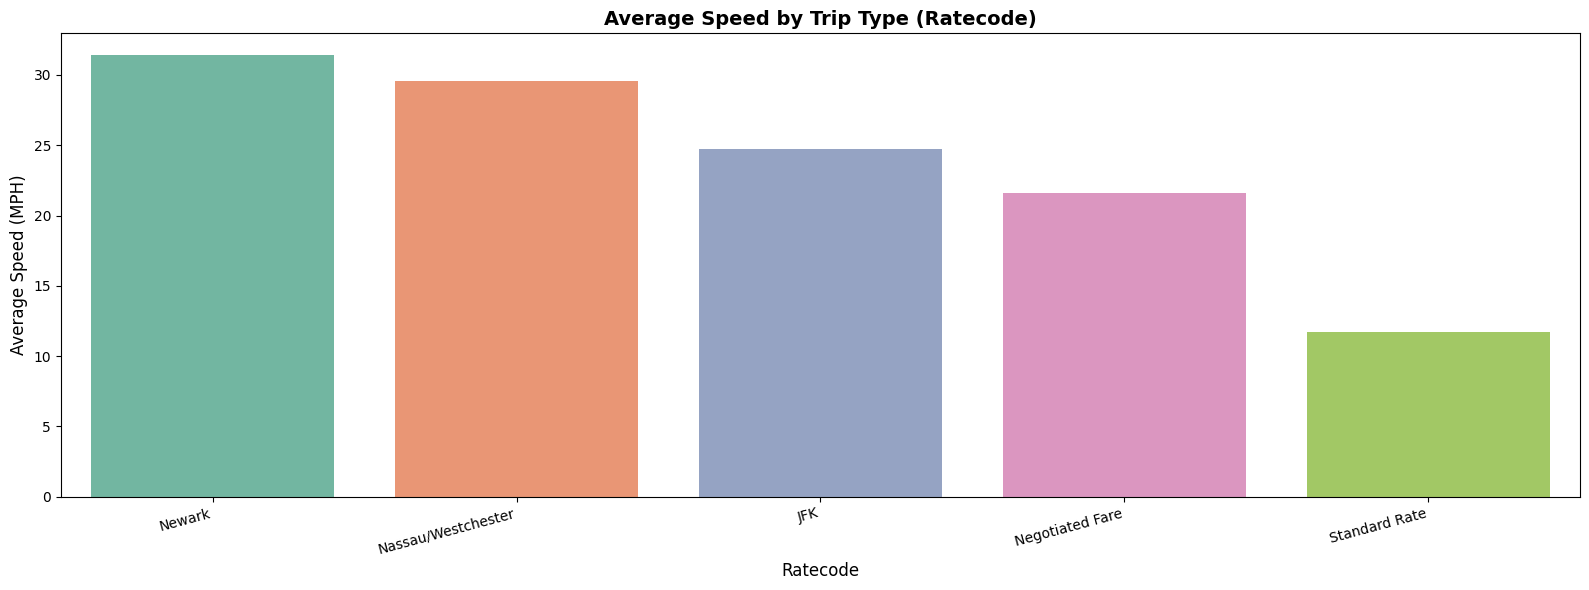

In [58]:
plt.figure(figsize=(16, 6))

sns.barplot(
    x='Ratecode_Name', y='avg_speed_mph', data=ratecode_performance,
    palette='Set2', order=ratecode_performance['Ratecode_Name']
)
plt.title('Average Speed by Trip Type (Ratecode)', fontsize=14, fontweight='bold')
plt.xlabel('Ratecode', fontsize=12)
plt.ylabel('Average Speed (MPH)', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Diarra  Lenovo\AppData\Local\Temp\ipykernel_33644\3199883781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


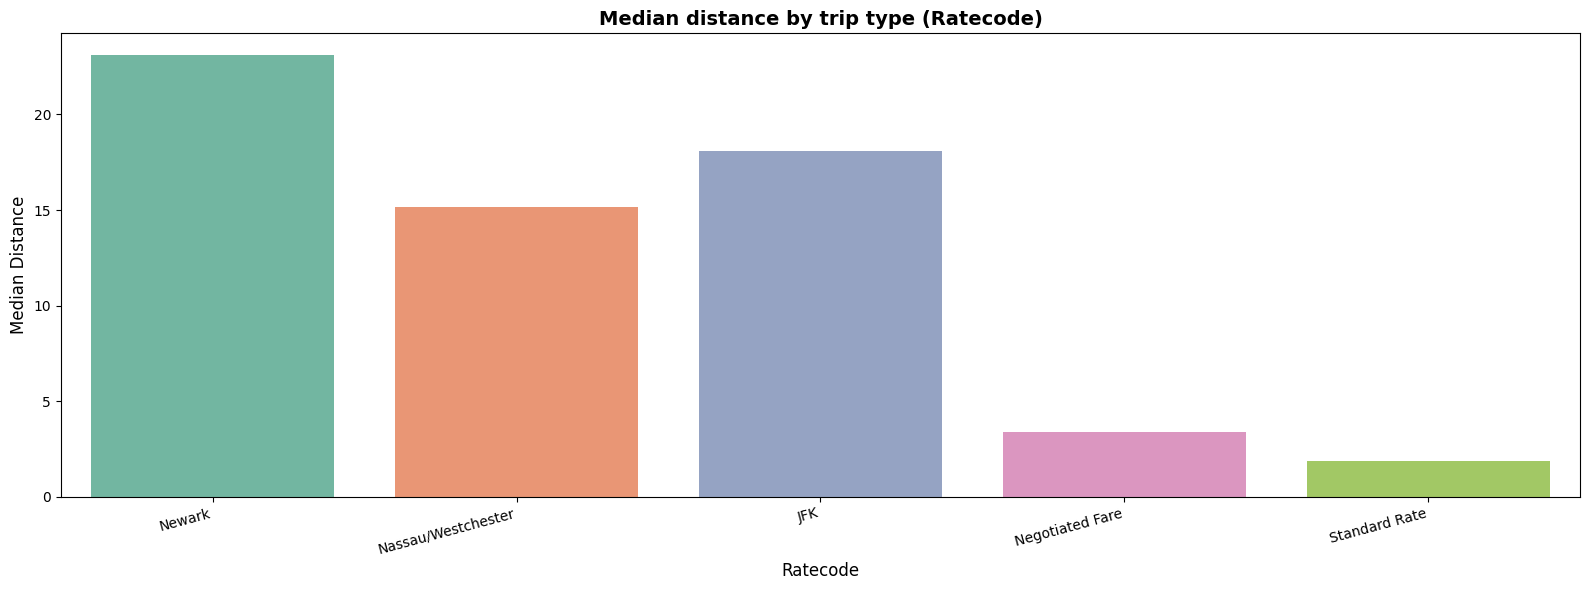

In [59]:
plt.figure(figsize=(16, 6))

sns.barplot(
    x='Ratecode_Name', y='median_distance', data=ratecode_performance,
    palette='Set2', order=ratecode_performance['Ratecode_Name']
)
plt.title('Median distance by trip type (Ratecode)', fontsize=14, fontweight='bold')
plt.xlabel('Ratecode', fontsize=12)
plt.ylabel('Median Distance', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


We can see from the 2 bar plot that Newark has the highest average speed trip of 31.3886 mph and the longest trip distance of 23.09 miles. While Standard has the lowest average speed trip of 11.6844 mph and the shortest trip distance of 1.88 miles. With Newark has the lowest trip count of 15 and Standard has the highest trip count of 58927.

So we can conclude that the longer the trip distance is the higher the average speed of each trip going to be, for the longest distance of >20 miles Newark is going to be the best TAXI choices. While for 15 to 18 miles people tend to lean towards Nassau and JFK. While for shorter trip Standard is definitely prefered by a lot of people even though it is slower. Negotiated Fare likely being used for 2 miles to 4 miles trip distance with good overall good speed, however people likely still choose Standard for shorter trip. Based on the data we have Newark most likely is the most expensive and Standard is the cheapest option, we are going to know after we do the next revenue & cost analysis (after this).

**Revenue & Cost**

In order to to know how much revenue the driver get from tipping we need to aggregate the count of 'lpep_pickup_datetime', the mean of 'tip_percentage' and the median of 'tip_amount'.

In [60]:
# Tipping Behavior by Payment Type
tipping_by_payment = df[df['tip_amount'] > 0].groupby('Payment_Name').agg(
    total_trips=('lpep_pickup_datetime', 'count'),
    mean_tip_percent=('tip_percentage', 'mean'),
    median_tip_amount=('tip_amount', 'median')
).reset_index().sort_values(by='mean_tip_percent', ascending=False)

print("\nTipping Behavior by Payment Type:")
print(tipping_by_payment.to_markdown(index=False))



Tipping Behavior by Payment Type:
| Payment_Name   |   total_trips |   mean_tip_percent |   median_tip_amount |
|:---------------|--------------:|-------------------:|--------------------:|
| Cash           |             1 |            19.3424 |                   5 |
| Credit Card    |         34640 |            15.7469 |                   3 |


As we can see here that there is only 1 tipping using cash with the amount of 5 dollar. While the rest 34640 trips tip using credit card with the average tipping of 3 dollars. And the percentage average of the tip people give to the driver is 15.7469% of the cost. And there are also around 25000 trips that people does not tip.

Text(0, 0.5, 'Count')

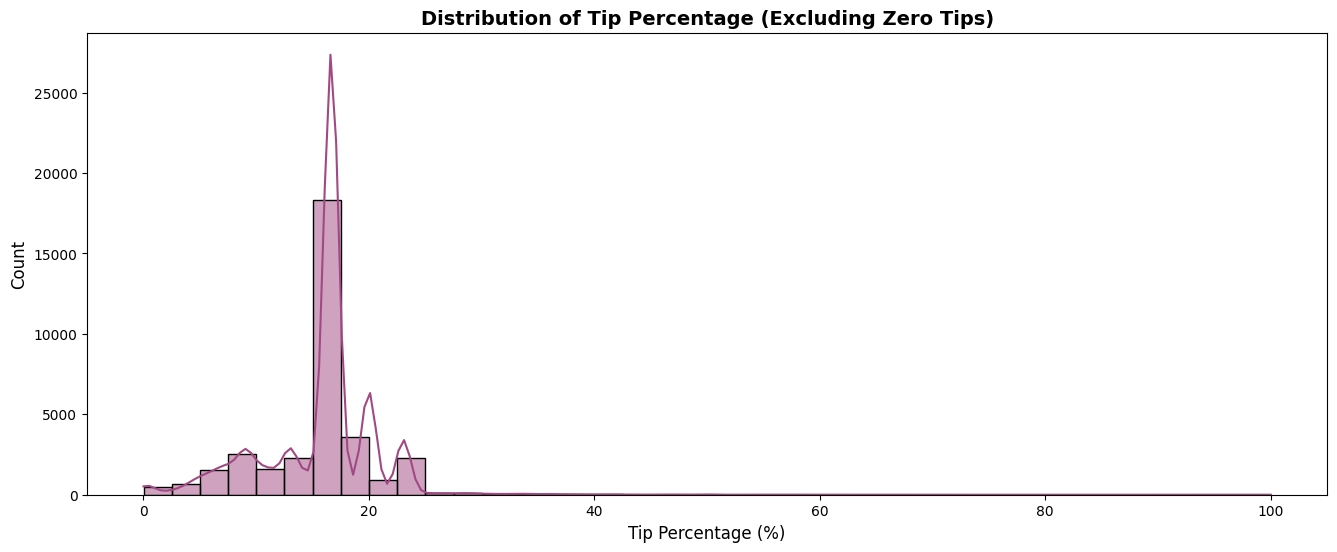

In [61]:
plt.figure(figsize=(16, 6))

# Tip Percentage Distribution (Focused on Tipped Trips)
sns.histplot(df[df['tip_percentage'] > 0]['tip_percentage'], bins=40, kde=True, color="#A04983")
plt.title('Distribution of Tip Percentage (Excluding Zero Tips)', fontsize=14, fontweight='bold')
plt.xlabel('Tip Percentage (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)


From the histplot we see that most people tipping at around 15% of the cost, it's prossibly the most 'acceptable' tips for TAXI service in the NYC.

For efficiency cost we are going to compare the average 'cost_per_mile' and 'fare_per_minute'

In [62]:
# Cost Efficiency Metrics
cost_efficiency = {
    "Metric": ["Overall Mean Cost per Mile", "Overall Mean Fare per Minute"],
    "Value": [df['cost_per_mile'].mean(), df['fare_per_minute'].mean()]
}
cost_efficiency_df = pd.DataFrame(cost_efficiency)

print("\nKey Cost Efficiency Metrics:")
print(cost_efficiency_df.to_markdown(index=False))


Key Cost Efficiency Metrics:
| Metric                       |   Value |
|:-----------------------------|--------:|
| Overall Mean Cost per Mile   |  9.4876 |
| Overall Mean Fare per Minute |  1.2767 |


From the metrics we see that the average cost per mile each trip cost around 9.4876 dollars And 1.2767 Fare cost per minutes.

So now we compare the average cost per mile with the amount of trip distance that happening, we use distance_bin with cut function so that the trip distance is categorized into 1-mile range distance (to have easier trend to see/follow).

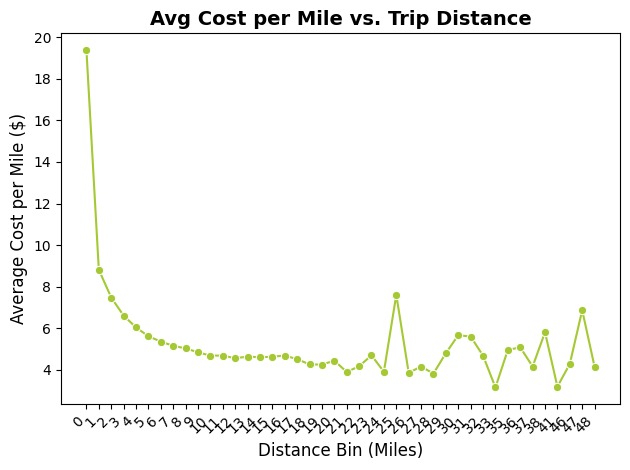

In [63]:
# Average Cost per Mile vs. Trip Distance

# Calculate average cost per mile for bins of distance
df['distance_bin'] = pd.cut(df['trip_distance'], bins=np.arange(0, 50, 1), include_lowest=True, right=False)
cost_by_distance = df.groupby('distance_bin', observed=True)['cost_per_mile'].mean().reset_index()

sns.lineplot(
    x=cost_by_distance['distance_bin'].astype(str).str.split(',', expand=True)[0].str.replace('[', ''),
    y='cost_per_mile', data=cost_by_distance, marker='o', color="#a4c933"
)
plt.title('Avg Cost per Mile vs. Trip Distance', fontsize=14, fontweight='bold')
plt.xlabel('Distance Bin (Miles)', fontsize=12)
plt.ylabel('Average Cost per Mile ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the lineplot we see that the average cost start very high on lower distance and then start to stabilize the longer the distance move until 25 miles, and then the cost start wiggle around. We can conclude that the base cost of the TAXI is fairly high so if we take the drive for less than 1 miles, we are going to pay a lot more than we realize. and with the prize stabilize from around 2 miles to 24 miles that means there are a lot more data in that range of travel. So we can conclude that people use the TAXI service for travel around 2 miles to 24 miles. And the wiggle on 25+ miles mean that we have less data on the travel, which mean people don't use that much TAXI service for travel more that 24 miles.

**Conclusion**

From the analysis that has been done, we can make the following conclusions about improving the *New York City Taxi and Limousine Commission (TLC)* operation:

1. From 59860 ride that happen in NYC, 58927 uses the standard rate making it the most common way to use TAXI rate.
2. Most ride happen Location ID 74 with 12610 rides and Location ID 75 with 8618, while number 3 most ride with 3646 is Location ID 95.
3. Because most people happen to only ride with less than 2 miles people use the standard rate, while above 2 miles they start to consider the other option like Newark.
4. The longer the trip going to take, the faster the TAXI is going to move (mostly true except JFK)
5. The amount of trip during sunday to monday range between 7200 to 9900 and its consistently in that range.
6. During 0 a.m to 6 a.m has the least amount of trip but immediately jump in number during 7 a.m. And 7 a.m to 9 p.m. has the most TAXI usage (rush hour) and then slowly drop at 10 p.m.
7. 34640 people tipping during the ride out of 59860 count making around 57,8% of passenger do ti, 42% tipping equal to or above 15%.
8. All the tipping done by credit card (except 1) with around 15% of the trip cost.
9. In average people pay around 9.4876 dollars per miles and 1.2767 Fare cost per minutes.
10. The average cost per miles of trip significantly higher the shorter your trip distance is, and immediately reduce while stabilizing around 4 miles.

**Recommendation**

1. Location ID 74 and 75 has the most ride happening with the different with the 3rd place is around 5000 ride. Making these 2 location very important for both passenger and TAXI driver. So these 2 location need to be prioritized for improvement.
2. TLC operation need to improve the quality of standard rate TAXI car immediately to make sure that both driver and passenger is comfortable during journey because the amount of usage with those TAXI is very high.
3. JFK need to have a way to made their car faster, either having a faster car, better driver or better routing because their speed is slower then Nassau.
4. We need to improve and prioritized the ride around 7 a.m to 9 p.m. because thats where the most volume of trip.
5. Because the cost of short distance travel is quite high we also need to prioritized improvement for it as well. Station the best short distance driver around the area to make sure passenger feels safe and comfortable.
6. In order to improve the amount of people tipping to be more than 57.8% with around 15.8% people still tips less than 15%, driver also need to be more friendly to make sure they got more tips from the passenger. 

**Converting df into csv file for Tableau**

In [64]:
df.to_csv(output_file_name_tableau, index=False)